The goal of Supervised Learning is to learn or derive a target function which can best determine the target variable from the set of variables

Lets understand the functions such as Target function,Loss Function and Cost Function.

If the target function is too simple,it may not be able to capture the essential nuances and represent the undelying data as well.

Some frequently used or tracked functions are:

A Cost Function (also called Error Function)helps to measure the extent to which the model is going wrong in estimating the relationship between X and Y.In that case we can say Cost Function can tell how better our model is behaving (performing).For example R squared value is basically the Cost Function for regression models.

Loss function is similar to Cost Function the only difference is being loss function is usually defined on a singel data point,whereas Costfunction is defined for the entire training data.

In general, regularization means to make things regular or acceptable.In the context of machine learning, regularization is the process which regularizes or shrinks the coefficients towards zero. In simple words, regularization discourages learning a more complex or flexible model, to prevent overfitting.


Overfitting and Underfitting plays a key role in Machine Learning Process.
Overgeneralizing is something that we humans do all too often.
Overfitting refers to a situation where the model has been designed in such a way that it emulates the training datatoo closely.It means that the model performs well on the training data,but it doesnot generalize well.

Underfitting can be avoided by training more data,reducing the features by feature selection.


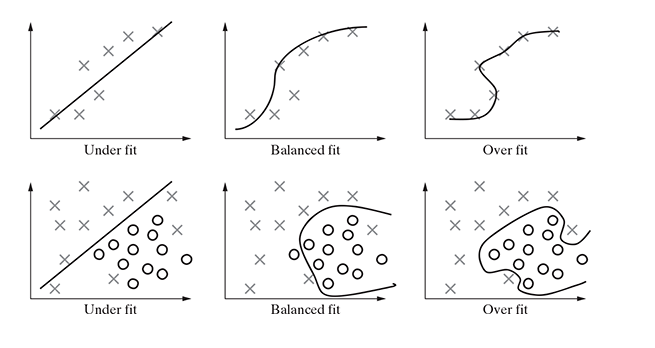

Before we begin with the Regularized Linear Models such as Ridge Regression,Lasso Regression we need to understand two key terms such as Bias and Variance.

Bias -->making wrong assumptions
Variance -->due to small variations in the training data

Constraining the model to make it simpler and reduce the risk of OverFitting is called Regularization.

A good way to reduce overfitting is to regularize the model
(i.e., to constrain it)the fewer degrees of freedom it has the harder it will be to overfit the data.

Just like cancer treatment should destruct the cancer cells alone and not affect the healthy cells in the body, the regularization approach should attack the noise alone and not affect the signal. Intuitively, when a regularization parameter is used, the learning model is constrained to choose from only a limited set of model parameters.

Two of the commonly used techniques are L1 or Lasso regularization and L2 or Ridge regularization. Both these techniques impose a penalty on the model to achieve dampening of the magnitude. In the case of L1, the sum of the absolute values of the weights is imposed as a penalty while in the case of L2, the sum of the squared values of weights is imposed as a penalty.

As generally vectorized form of Linear Regression is as follows:

y∧ = h(theta)(x) = θ∧T.x 

θ is the model’s parameter vector, containing the bias term θ0
and the feature weights θ1 to θn.


Ridge Regression is a regularized version of Linear regression,a regularization term is added to the cost function.It should be only added to the cost function during training.

Cost Function J(theta) = MSE(theta) + α*1/2∑(i=1 to n)θ²

where θ = (X.^T.X + αA)^-1.X^T.y, A is the n * n identity matrix,θ is the value which minimizes the cost function,y is the vector of target variable and X is the training set.

Thus the hyperparamer α controls how much you want to regularize the model.If α = 0,then RR is simply Linear Regression.If α is very large,all the weights end up very close to zero,it results in a flat line.


In [1]:
#Ridge Regression with simple example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

In [2]:
X,y,coefficients = make_regression(n_samples=50,
                                  n_features=1,
                                  n_informative=1,
                                  n_targets =1,noise = 5,coef=True,
                                   random_state=1)
alpha = 1

In [4]:
#We create the identity matrix.In order for the equation,
#we saw previously in the above lines
n,m = X.shape
I = np.identity(m)
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)+alpha*I),X.T),y)

In [6]:
w

array([87.37153533])

In [7]:
coefficients

array(90.34019153)

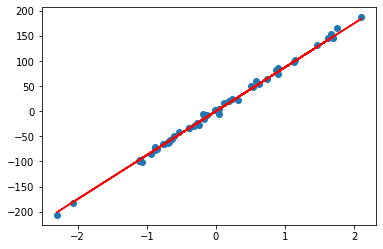

In [8]:
#lets look how does the regression fits the data
plt.scatter(X,y)
plt.plot(X,w*X,c="red")
plt.show()

In [9]:
#Lets try to find out the same above process with the 
#scikit-learn Ridge function,first we create and train an
# instance of Ridge class
rr = Ridge(alpha=1)
rr.fit(X,y)
w = rr.coef_
w

array([87.39928165])

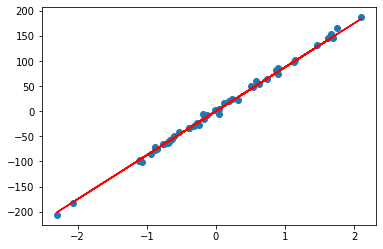

In [10]:
plt.scatter(X,y)
plt.plot(X,w*X,c="red")
plt.show()

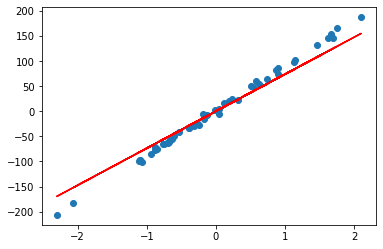

In [12]:
#Next lets try to visulize by changing alpha value
rr = Ridge(alpha=10)
rr.fit(X,y)
w = rr.coef_[0]
plt.scatter(X,y)
plt.plot(X,w*X,c='red')

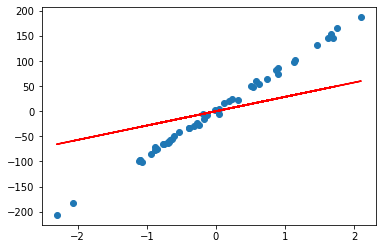

In [13]:
rr = Ridge(alpha=100)
rr.fit(X,y)
w = rr.coef_[0]
plt.scatter(X,y)
plt.plot(X,w*X,c='red')
plt.show()

When alpha value is increasing we cn clearly see the regression line will tend towards mean 0 since that would minimize the variance across different datasets

As Ridge Regression generally works well even in presence of highly correlated features as it will include all of them in the model,but the coefficients will be distributed among them depending on the correlation.So lets check with boston dataset itself.

In [15]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [16]:
#Data Collection
boston = load_boston()
#boston

In [19]:
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


CRIM : Per capita crime rate by town
ZN :Residential land zoned for lots of 25,000 sq.ft
INDUS : proportion of non retail business acres per town
CHAS : Charles river dummy variable
NOX : Nitric Oxide Concentration
RM : average number of rooms per dwelling
AGE :proportion of owner occupied homes prior to 1940
DIS : weighted distances to five Boston employment centers
RAD : index of accessibility to highways
TAX : full-value of property tax per $10,000
PTRATIO : pupil teacher ratio by town
B : proportion of blacks by town
LSTAT : lower status of population 

In [20]:
boston_df['Land Price'] = boston.target

In [22]:
#boston_df

In [23]:
newX = boston_df.drop('Land Price',axis=1)
#newX
newY = boston_df['Land Price']

In [25]:
#Modelling 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newX,newY,test_size = 0.3,random_state=1)

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 0.01)
rr

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
#Training score
train_score = lr.score(X_train,y_train)
train_score

0.7103879080674731

In [38]:
#Test Score
test_score = lr.score(X_test,y_test)
test_score

0.7836295385076315

In [34]:
print("Linear Regression training score is:",train_score)

Linear Regression training score is: 0.7103879080674731


In [35]:
print("Linear Regression test score is:",test_score)

Linear Regression test score is: 0.7836295385076315


In [39]:
ridge_train_score = rr.score(X_train,y_train)
ridge_test_score = rr.score(X_test,y_test)

In [40]:
print("Ridge Regression Training score is:",ridge_train_score)
print("Ridge Regression Test score is:",ridge_test_score)

Ridge Regression Training score is: 0.7103864838468884
Ridge Regression Test score is: 0.783799100978662


In [41]:
from sklearn.metrics import mean_squared_error,r2_score
pred_train_lr = lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train,pred_train_lr))

4.849055005805464
0.7103879080674731


In [43]:
pred_test_lr = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test,pred_test_lr))

4.453237437198125
0.7836295385076315


In [46]:
pred_train_rr = rr.predict(X_train)
#Metrics for training part
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train,pred_train_rr))
#Metrics for testing part
pred_test_rr = rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test,pred_test_rr))

4.849066928849523
0.7103864838468884
4.4514921667626135
0.783799100978662


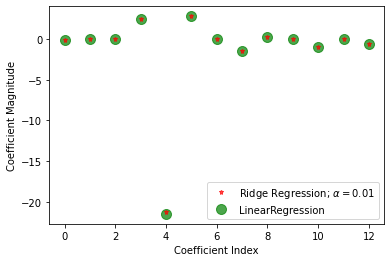

In [47]:
plt.plot(rr.coef_,alpha = 0.7,linestyle = 'none',marker='*',
         markersize=5,color='red',
         label=r'Ridge Regression; $\alpha = 0.01$',zorder=7)
plt.plot(lr.coef_,alpha = 0.7,linestyle = 'none',marker ='o',
         markersize=10,color='green',
         label = "LinearRegression")
plt.xlabel("Coefficient Index",fontsize = 10)
plt.ylabel("Coefficient Magnitude",fontsize = 10)
plt.legend(loc = "best")
plt.show()

So we will notice for low value of alpha denoted as red star when the coefficient magnitudes are less restricted,the coefficient magnitudes are as of linear regression,so lets try with alpha = 100

In [49]:
rr = Ridge(alpha = 100)
rr.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
ridge_train_score = rr.score(X_train,y_train)
ridge_test_score = rr.score(X_test,y_test)
print(ridge_train_score)
print(ridge_test_score)

0.6817424284288655
0.7478638002897842


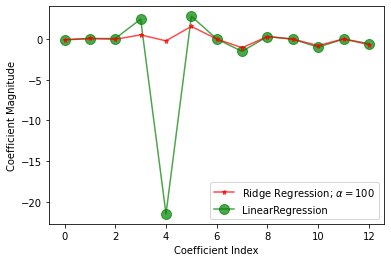

In [51]:
plt.plot(rr.coef_,alpha = 0.7,marker='*',markersize=5,color='red',
         label=r'Ridge Regression; $\alpha = 100$',zorder=7)
plt.plot(lr.coef_,alpha = 0.7,marker ='o',markersize=10,color='green',
         label = "LinearRegression")
plt.xlabel("Coefficient Index",fontsize = 10)
plt.ylabel("Coefficient Magnitude",fontsize = 10)
plt.legend(loc = "best")
plt.show()

Thus for the higher value for alpha for coefficient indices 3,4,5the magnitudes are considerably less compared to Linear Regression.